In [9]:

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv


In [10]:
#get html
url = 'https://www.amazon.nl/gp/bestsellers/books'
#change user-agent to value-based on your web browser
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

In [11]:
page = requests.get(url, headers=headers)

In [12]:
soup = BeautifulSoup(page.content, 'html.parser')

In [13]:
#get all books
books = soup.find_all(id="gridItemRoot")

In [14]:
csv_headers= ["Rank", "Title", "Author", "Price"]
with open('amazon_books.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(csv_headers)

In [15]:
for book in books:
    
    rank = book.find("span", class_="zg-bdg-text").text[1:]
    
    children= book.find("div", class_ = "zg-grid-general-faceout").div
    
    title= children.contents[1].text
    author= children.contents[2].text
    price= children.contents[-1].text
    
    with open('amazon_books.csv', 'a', encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([rank, title, author, price])

In [16]:
amazon_books= pd.read_csv('amazon_books.csv', )

In [18]:
amazon_books.head()

,Rank,Title,Author,Price
0,1,"Atomic Habits - Tiny Challenges, Remarkable Re...",Clear James,"€ 11,59"
1,2,Twisted Love: the TikTok sensation! Fall into ...,Huang Ana,"€ 8,46"
2,3,Twisted Hate: the TikTok sensation! Fall into ...,Huang Ana,"€ 9,79"
3,4,Icebreaker,Grace Hannah,"€ 11,49"
4,5,Things We Hide From The Light: the unforgettab...,Score Lucy,"€ 11,49"


In [27]:
amazon_books["Price"]= amazon_books["Price"].replace("[€,]", "", regex=True).astype(int)

In [28]:
amazon_books["Rank"]= amazon_books["Rank"].astype(int)

<AxesSubplot:xlabel='Author'>

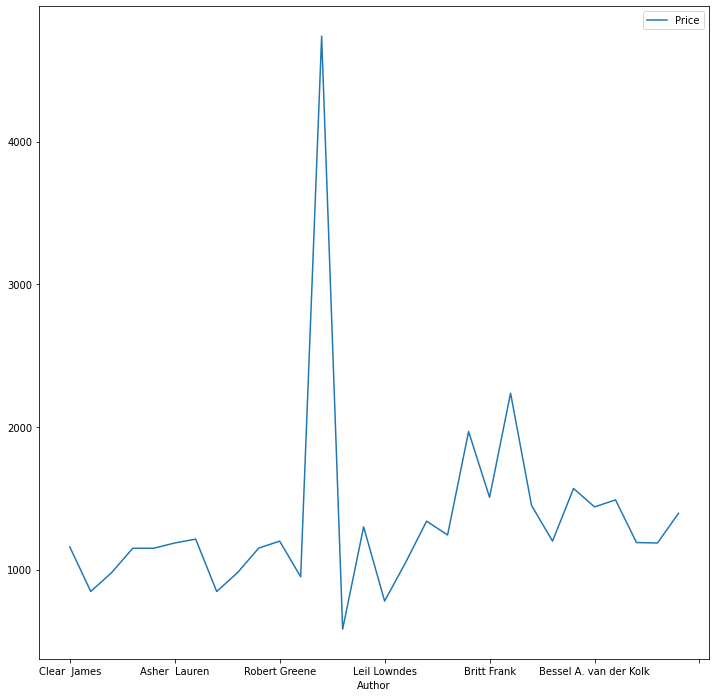

In [39]:
amazon_books.plot(x="Author", y="Price", figsize=(12,12) )

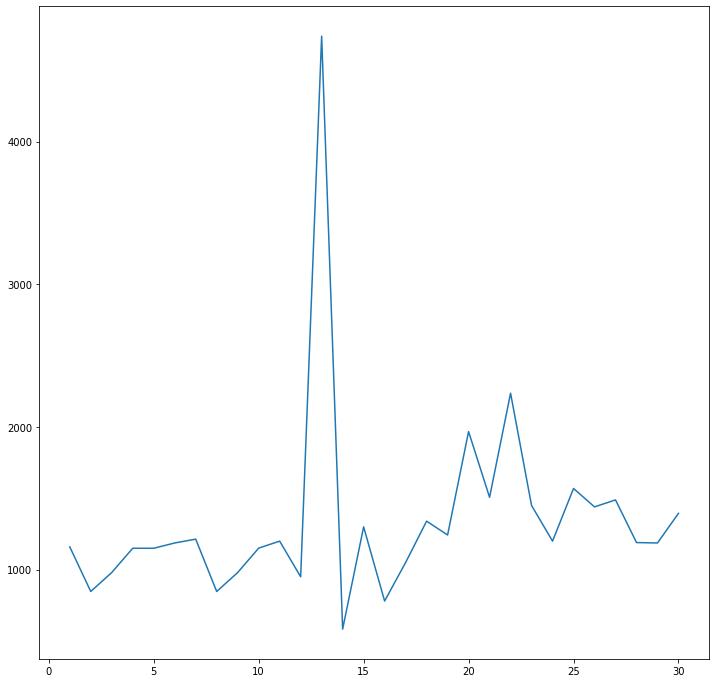

In [36]:
import matplotlib.pyplot as plt

x = amazon_books["Rank"]
y = amazon_books["Price"]

plt.rcParams['figure.figsize'] = [12, 12]
plt.plot(x,y)

plt.show()
